In [ ]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
from scipy.stats import chi2_contingency

In [ ]:
drive.mount('/content/gdrive')
file_path = "/content/gdrive/My Drive/Colab Notebooks/"
draft_data = pd.read_csv(file_path + "nhldraft.csv")

Mounted at /content/gdrive


In [ ]:
draft_data.head()

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#top 32 draft picks and each position
position_draft_data = draft_data[
    (draft_data['overall_pick'] >= 1) &
    (draft_data['overall_pick'] <= 32) &
    (draft_data['position'].isin(['D', 'C', 'LW', 'RW', 'G']))] #isin pandas function filters data within a DataFrame based on specified values


# Count the number of players drafted at each position
position_counts = filtered_draft_data.groupby('position')['overall_pick'].count()
position_counts


,overall_pick
position,
C,467
D,583
G,101
LW,324
RW,318


In [ ]:
#C, RW, and LW are all forward positions so this gets the total amount of forwardss
position_counts = draft_data['position'].value_counts()
forwards = position_counts[['C', 'RW', 'LW']].sum()
print("Amount of forwards drafted: ", forwards)
print("Amount of defensemen drafted: ", position_counts['D'])
print("Amount of goalies drafted: ", position_counts['G'])

Amount of forwards drafted:  6789
Amount of defensemen drafted:  3966
Amount of goalies drafted:  1217


In [ ]:
#These are 7 data frames for each round of the draft, they are mainly estimations because teams were added throughout the years
# Round 1
round1 = draft_data[(draft_data['overall_pick'] >= 1) & (draft_data['overall_pick'] <= 32)]
# Round 2
round2 = draft_data[(draft_data['overall_pick'] >= 33) & (draft_data['overall_pick'] <= 64)]
# Round 3
round3 = draft_data[(draft_data['overall_pick'] >= 65) & (draft_data['overall_pick'] <= 96)]
# Round 4
round4 = draft_data[(draft_data['overall_pick'] >= 97) & (draft_data['overall_pick'] <= 128)]
# Round 5
round5 = draft_data[(draft_data['overall_pick'] >= 129) & (draft_data['overall_pick'] <= 160)]
# Round 6
round6 = draft_data[(draft_data['overall_pick'] >= 161) & (draft_data['overall_pick'] <= 192)]
# Round 7
round7 = draft_data[(draft_data['overall_pick'] >= 193) & (draft_data['overall_pick'] <= 224)]
print(len(round7))

1267


In [ ]:
#The purpose of this is to shorten the data to all be the same length because
#throughout the years, there were some drafts where the 7th round did not exist
#and shortening the data to the length of the 7th round does eliminate data, it makes it so graphs can be more accurate
round1 = round1.head(1267)
round2 = round2.head(1267)
round3 = round3.head(1267)
round4 = round4.head(1267)
round5 = round5.head(1267)
round6 = round6.head(1267)
round7 = round7.head(1267)



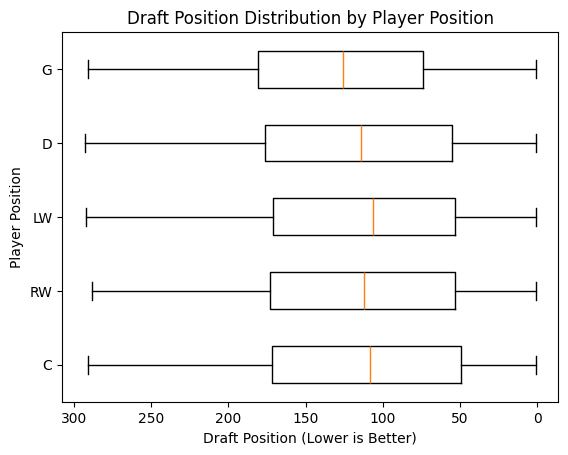

In [ ]:
#Boxplot to see how much position effects draft position
# Group by position for the box plot
positions = ['C', 'RW', 'LW', 'D', 'G']
data = [draft_data[draft_data['position'] == pos]['overall_pick'] for pos in positions]


plt.boxplot(data, vert=False, labels=positions)

# Customize the plot
plt.title('Draft Position Distribution by Player Position')
plt.xlabel('Draft Position (Lower is Better)')
plt.ylabel('Player Position')
plt.gca().invert_xaxis()  # Invert x-axis to have higher draft position on the right

plt.show()
#Forwards a drafted slightly higher than defenseman, and goalies on average are drafted much lower

Top Nationalities:


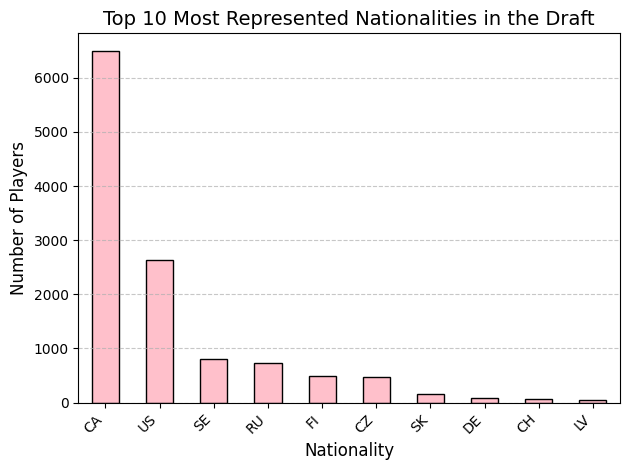

In [ ]:
nationality_counts = draft_data['nationality'].value_counts()

# Display statistics
print("Top Nationalities:")

# Plot the top 10 nationalities
#
nationality_counts.head(10).plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 10 Most Represented Nationalities in the Draft', fontsize=14)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

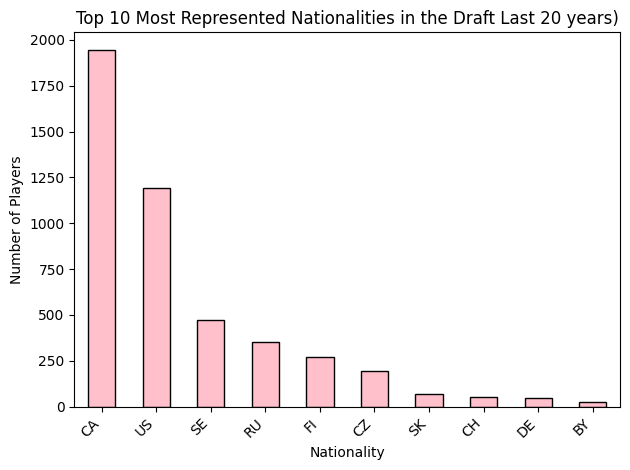

In [ ]:

draft_data_last20 = draft_data[draft_data['year'] > 2001]

# Count the number of players from each nationality
nationality_counts = draft_data_last20['nationality'].value_counts()

# Plot the top 10 nationalities

nationality_counts.head(10).plot(kind='bar', color='pink', edgecolor='black')
plt.title('Top 10 Most Represented Nationalities in the Draft Last 20 years)')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')


# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create a contingency table to do a chi-squared test on nationality and position
contingency_table = pd.crosstab(draft_data['nationality'], draft_data['position'])

# Perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-Squared Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
#there is a correlation between nationality and position

Chi-Squared Statistic: 5074.1194902254565
Degrees of Freedom: 1035
P-Value: 0.0


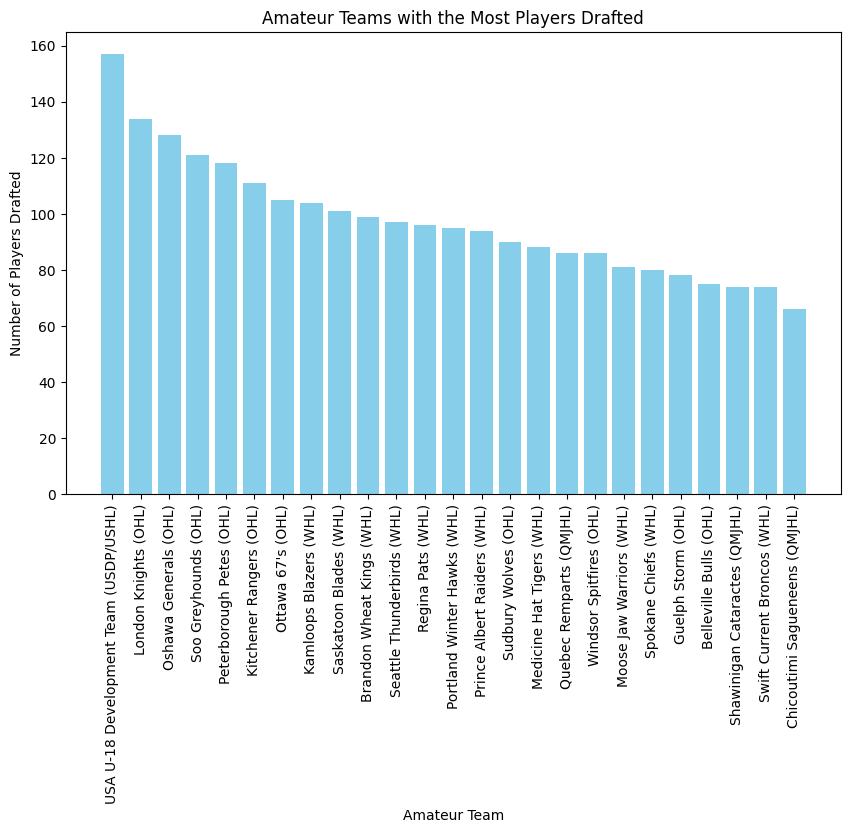

In [ ]:
#The amateur teams with the most drafted players
team_draft_counts = draft_data.groupby('amateur_team')['id'].count().sort_values(ascending=False)

#Gets the top 25 teams
top_teams = team_draft_counts.head(25)


plt.figure(figsize=(10, 6))
plt.bar(top_teams.index, top_teams.values, color='skyblue')
plt.xlabel("Amateur Team")
plt.ylabel("Number of Players Drafted")
plt.title("Amateur Teams with the Most Players Drafted")
plt.xticks(rotation=90)

plt.show()

In [ ]:
#machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
valid_positions = ['C', 'LW', 'RW', 'D', 'G']
draft_data = draft_data[draft_data['position'].isin(valid_positions)]

In [ ]:
X = draft_data[['age','year']]
y = draft_data.overall_pick
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train)

        age  year
10181  18.0  1980
9070    NaN  1985
5633    NaN  1998
3849   20.0  2005
9628   18.0  1983
...     ...   ...
3896   18.0  2004
59     18.0  2022
6002    NaN  1997
3922   18.0  2004
1295   19.0  2017

[9577 rows x 2 columns]


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.dropna(inplace=True)
X_train = train_data.drop(columns=[y_train.name])
y_train = train_data[y_train.name]

#Train Machine Learning Model
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediction = classifier.predict(X_test)
print(prediction[0:25])

[ 37  43  68  63  32  55  54   1  56   7  66   4  25  43  37  43 263  54
  56 171 140  26  38  25 140]


In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy*100)

0.0


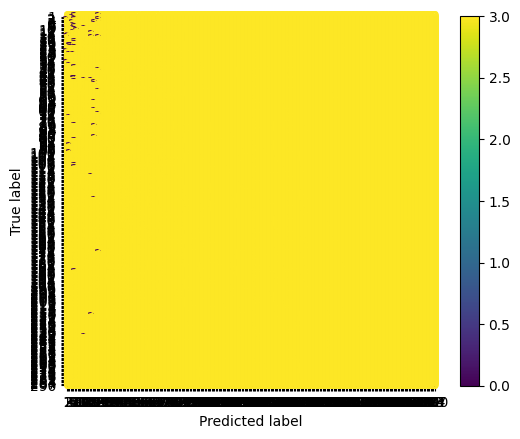

In [ ]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)